In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import pywt

In [2]:
rate, data = wavfile.read('hiya.wav')
rate,len(data) 

(44100, 50546)

In [3]:
time=len(data)/rate
time

1.1461678004535147

Text(0.5, 1.0, 'Plotting Audio Signal in Time Domain')

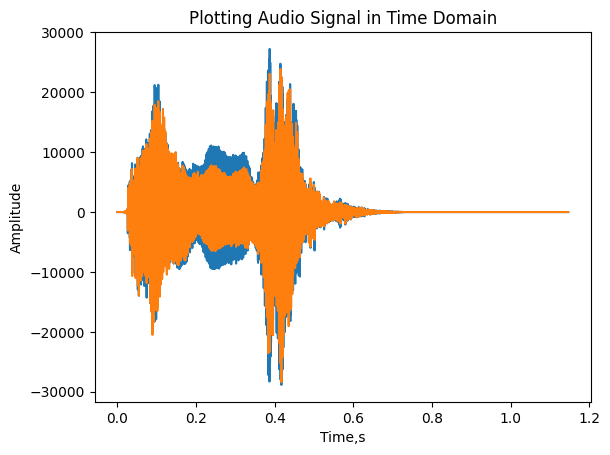

In [4]:
t = np.linspace(0,time,len(data))
plt.plot(t,data)
plt.xlabel('Time,s')
plt.ylabel('Amplitude')
plt.title('Plotting Audio Signal in Time Domain')

In [5]:
non_zero_mask = data[:, 0] != 0
if np.any(non_zero_mask):
    # Find continuous non-zero range
    start = np.argmax(non_zero_mask)
    end = len(non_zero_mask) - np.argmax(non_zero_mask[::-1])

    # Clip data to only that range
    clipped_data = data[start:end, 0]
else:
    clipped_data = data[:, 0]

(34750,) 44100


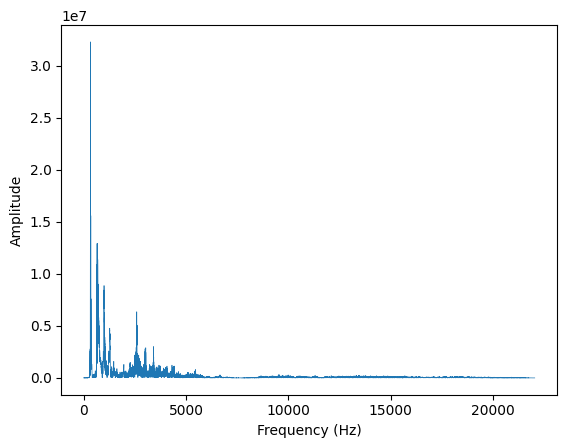

In [7]:
print(clipped_data.shape, rate)
signal = data[:rate,0] 
Signal = fft(signal)
plt.plot(np.abs(Signal[:rate//2]), lw=.5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()   

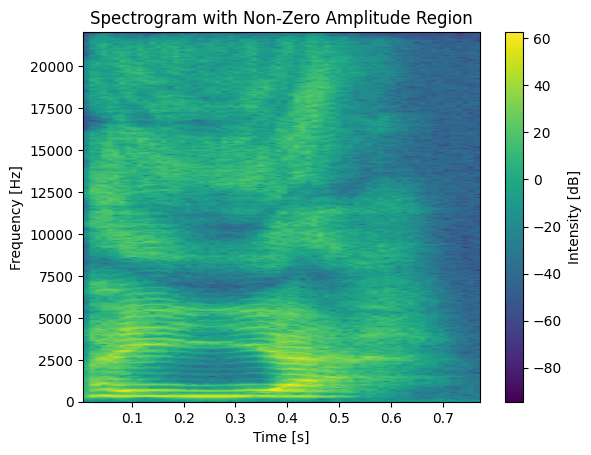

In [8]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(
    clipped_data,
    Fs=rate,
    NFFT=1024,  
    noverlap=512, 
    cmap='viridis'
)
cbar = plt.colorbar(imageAxis)
cbar.set_label('Intensity [dB]')

plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram with Non-Zero Amplitude Region')
plt.show()